In [48]:
import numpy as np
import imageio
import cv2 
import glob
import matplotlib.pyplot as plt
import utility as util

## Create Images


In [38]:
circle_coordinates = np.arange(15,90,5)
out_images = []
counter  = 0
render_list = []
for x in circle_coordinates:
    image = np.full([100,100,3],[255,255,255],dtype = float)
    circ = np.zeros([100,100,3])
    circ = cv2.circle(
	circ, 
	(x, 45), 
	5, 
	(255, 255, 255), 
	5 
    )
    image -= circ
    image = image.astype(np.uint8)
    plt.imsave("Images/" + str(counter) + ".png",image)
    render_list.append(image)
    counter += 1


## Import Images


In [39]:
images = sorted(glob.glob("Images/*.png"))
image_list = []
for image in images:
    temp = plt.imread(image,"png")
    image_list.append(temp.astype(float))

## Generate Sinusoids

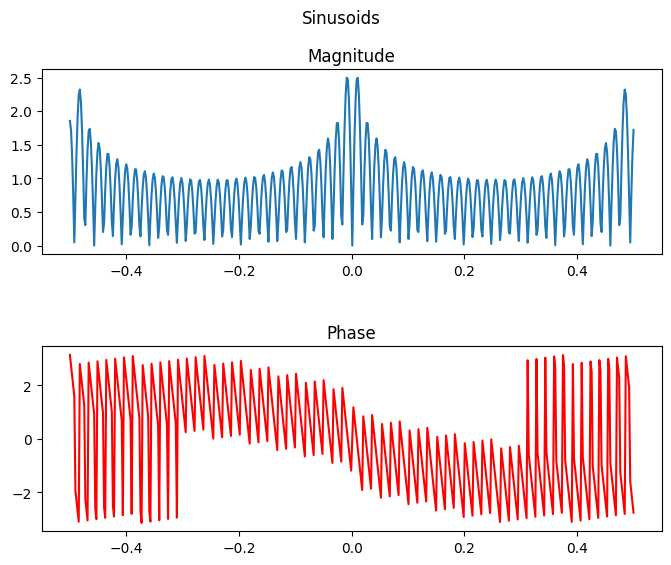

In [40]:
sr = 64
add = np.zeros(sr)
lin = np.linspace(0.,1.,sr) 
for i in range(1,sr // 2 - 1):
    sinusoid = np.sin(2 * np.pi * i * lin)
    add += sinusoid
add *= (1.0 / float( sr // 2) )
util.magphase_plot(add, "Sinusoids")

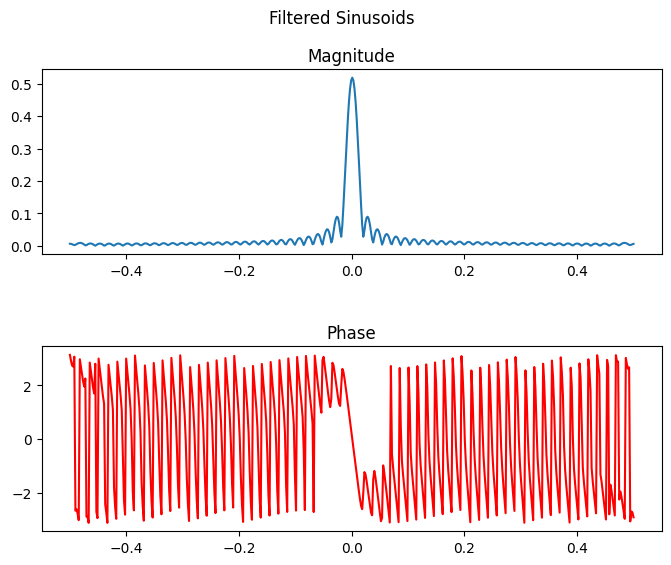

In [41]:
signal_with_filter  = np.zeros_like(add)
fb = np.zeros(1)
for i in range(sr):
    signal_with_filter[i] = add[i] * 0.01 + fb[0]
    fb[0] = signal_with_filter[i] * 0.99
util.magphase_plot(signal_with_filter, "Filtered Sinusoids")

In [51]:
size = [100,100]

images_copy = image_list.copy()

sr = 100 * 100
hz = 100

dt_max = int((1 / 10) * sr)
feedback = -0.99
flat_size = 100 * 100 * 4
temp  = np.zeros(flat_size)
temp_out  = np.zeros(flat_size)
leaky  = np.zeros(flat_size)
out_image =  np.zeros(100 * 100 * 4)
delayread = 0
delayread2 = 0
num_iters  = (7 * 4) * 4
render_list = []
num_iters= len(image_list)
lfo = np.linspace(0.01,0.99,num_iters)
render_list = []
for num_iter in range(num_iters):
    current = lfo[num_iter]
    interp = 1.0 - current
    leaky[:] = 0
    temp[:] = 0
    temp_out[:] = 0
    for image in images_copy:
        image_flat  = image.flatten()
        temp_out = image_flat * current - leaky * interp
        leaky += image_flat * 0.001
        out = np.reshape(temp_out,[100,100,4])
        out = out * 255
        render_list.append(out.astype(np.uint8))




In [52]:
imageio.mimsave('Renders/LeakyLFO.gif', render_list, loop=65535)